# Job Clustering Based on Job Description

Attached, you would find a dataset downloaded from Kaggle. This dataset contains job
offers.

According to the job description columns, would you be able to categorise the jobs ?
Technology to use: Python and libraries of your choice

What does this have:
Jupyter notebook explaining the solution.

## Summary:

### 1) Imported the required packages

### 2) Pre-processed the data

### 3) Stop Words Removal, Stemming and Tokenization are performed for clean vectorization of the corpus

### 4) Used TF-IDF for quick Vectorization

### 5) Used Elbow method to determine the number of clusters

### 6) And the number of clusters are formed and printed to visualize the way in which clusters are formed

### 7) Finally Kmean fitpredict shall be used to identify the cluster of the JobDescription.

## Importing All the necessary Packages


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [2]:
data = pd.read_csv("data job posts.csv",error_bad_lines=False,usecols =["JobDescription"])

In [3]:
data = data.dropna(how='any',axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15109 entries, 0 to 19000
Data columns (total 1 columns):
JobDescription    15109 non-null object
dtypes: object(1)
memory usage: 236.1+ KB


## Deleting dupliate headlines

In [4]:
data[data['JobDescription'].duplicated(keep=False)].sort_values('JobDescription').head(8)

,JobDescription
9915,"""""Armenia"" International Airports"" CJSC is see..."
10510,"""""Armenia"" International Airports"" CJSC is see..."
17116,"""4h"" LLC is searching for a result-oriented\r\..."
17112,"""4h"" LLC is searching for a result-oriented\r\..."
4228,"""ADF Shops"" CJSC is seeking Shop Assistants to..."
5182,"""ADF Shops"" CJSC is seeking Shop Assistants to..."
5018,"""ADF Shops"" CJSC is seeking Shop Assistants to..."
3281,"""ADF Shops"" CJSC is seeking a Shop Assistant t..."


In [5]:
data = data.drop_duplicates('JobDescription')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12861 entries, 0 to 19000
Data columns (total 1 columns):
JobDescription    12861 non-null object
dtypes: object(1)
memory usage: 201.0+ KB


## Preparing data for vectorizaion

## Using TF-IDF ranking

In [7]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
#from nltk.corpus import stopwords
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = data['JobDescription'].values
vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(desc)

In [8]:
word_features = vectorizer.get_feature_names()
print(len(word_features))
print(word_features[5000:5100])

11331
['hospitalization', 'hospitalized', 'hospitals', 'host', 'hosted', 'hostel', 'hostess', 'hostile', 'hosting', 'hot', 'hotel', 'hotels', 'hotline', 'hotliner', 'hour', 'hours', 'house', 'household', 'households', 'housekeeper', 'housekeeping', 'houseman', 'houses', 'housing', 'hovnanian', 'hp', 'hpc', 'hpiu', 'hplc', 'hps', 'hq', 'hqs', 'hr', 'hra', 'hrazdan', 'hrbg', 'hrbgs', 'hrdi', 'hrdo', 'hre', 'hrh', 'hrm', 'hrod', 'hrw', 'hs', 'hsbc', 'hsbcnet', 'hsbcs', 'hsc', 'hsd', 'hse', 'ht', 'htm', 'html', 'html5', 'hts', 'htta', 'http', 'huawei', 'hub', 'hubs', 'huge', 'human', 'humanitarian', 'humanities', 'humanity', 'hung', 'hunger', 'hunting', 'huos', 'hurdles', 'husbandry', 'hva', 'hvac', 'hven', 'hw', 'hybrid', 'hydraulic', 'hydraulics', 'hydro', 'hydrological', 'hydrologist', 'hydroponic', 'hydropower', 'hygiene', 'hygienic', 'hypermarket', 'hypothetical', 'hypotheticals', 'hyrogeological', 'ia', 'iabp', 'iam', 'iams', 'iap', 'ias', 'iasb', 'iasc', 'iascf', 'iatc']


## Stemming and Tokenizing


In [9]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

## Tagging and Chunking

In [13]:
def tagging(text):
    return [nltk.pos_tag(tokenize(text))]
            
def chunking(text):
    return nltk.ne_chunk(tagging(text))

## Vectorization with stop words, stemming and tokenizing

In [14]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)
X2 = vectorizer2.fit_transform(desc)
word_features2 = vectorizer2.get_feature_names()
print(len(word_features2))
print(word_features2[:50]) 

C:\Users\rpras\Anaconda3\envs\new_environment\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


7379
['aa', 'aaa', 'aaasf', 'aac', 'aaff', 'aalaverdyan', 'aalyst', 'aam', 'aarhus', 'aarki', 'aashto', 'aasp', 'aau', 'ab', 'aba', 'abandon', 'abap', 'abat', 'abattoir', 'abbott', 'abbrevi', 'abc', 'abdomin', 'abid', 'abil', 'abkhazia', 'abl', 'abmdp', 'abo', 'abort', 'abov', 'abovement', 'abovian', 'abovyan', 'abreast', 'abroad', 'absenc', 'absent', 'abser', 'absolut', 'absorb', 'abstract', 'abt', 'abus', 'ac', 'acaa', 'academ', 'academi', 'academia', 'acba']


In [15]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
X3 = vectorizer3.fit_transform(desc)
words = vectorizer3.get_feature_names()

# For this, we will use k-means clustering algorithm

## We use Elbow method to select the number of clusters

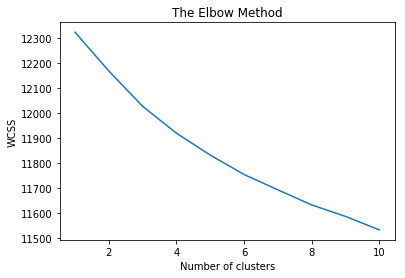

In [16]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

## As we can see more than one elbows, we will have to select right amount of clusters by trial and error. Lets try 3, 5, 6 and 8

In [17]:
print(words[250:300])

['deleg', 'deliv', 'deliver', 'deliveri', 'demand', 'democrat', 'demonstr', 'depart', 'deploy', 'depth', 'deputi', 'descript', 'design', 'desk', 'determin', 'develop', 'differ', 'digit', 'direct', 'director', 'disabl', 'disast', 'disciplin', 'discuss', 'display', 'dissemin', 'distribut', 'divis', 'doctor', 'document', 'domest', 'donor', 'draft', 'draw', 'drive', 'driven', 'driver', 'drug', 'durat', 'dure', 'duti', 'dynam', 'e', 'econom', 'economi', 'edit', 'editor', 'edmc', 'educ', 'effect']


# 3 Clusters

In [18]:
kmeans = KMeans(n_clusters = 3, n_init = 20, n_jobs = 1) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(X3)
# We look at 3 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : respons, manag, incumb, project, work, armenia, servic, support, offic, compani, develop, seek, activ, administr, assist, provid, implement, market, program, oper, account, coordin, supervis, financi, report
1 : posit, look, candid, motiv, qualifi, llc, fulfil, seek, cjsc, profession, manag, high, account, experienc, sale, specialist, person, compani, work, market, armenia, depart, offic, invit, proactiv
2 : develop, softwar, design, web, applic, engin, look, team, senior, test, llc, project, compani, seek, work, c, product, java, net, join, qa, experienc, high, solut, motiv


# 5 Clusters

In [19]:
kmeans = KMeans(n_clusters = 5, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# We look at 5 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : sale, market, manag, respons, compani, product, seek, develop, llc, strategi, custom, incumb, look, activ, servic, plan, promot, specialist, busi, brand, depart, implement, posit, motiv, work
1 : account, chief, financi, report, posit, look, compani, respons, manag, candid, depart, financ, tax, activ, control, supervis, seek, organ, incumb, direct, procedur, qualifi, oper, perform, prepar
2 : posit, candid, look, fulfil, qualifi, motiv, cjsc, llc, profession, seek, high, person, manag, specialist, experienc, work, compani, armenia, offic, administr, invit, skill, bank, intern, self
3 : develop, softwar, web, design, applic, engin, look, team, senior, test, llc, compani, project, seek, c, work, product, java, net, join, qa, experienc, high, solut, motiv
4 : respons, manag, project, incumb, work, armenia, offic, support, administr, servic, assist, provid, seek, develop, program, implement, activ, compani, oper, coordin, supervis, look, intern, specialist, organ


# 6 Clusters

In [20]:
kmeans = KMeans(n_clusters = 6, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# We look at 6 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : project, program, armenia, implement, develop, manag, coordin, offic, work, support, assist, activ, supervis, respons, nation, provid, incumb, programm, technic, consult, fund, expert, direct, usaid, communiti
1 : posit, candid, look, fulfil, qualifi, motiv, llc, cjsc, profession, seek, high, specialist, manag, person, experienc, work, compani, invit, armenia, offic, bank, proactiv, skill, administr, intern
2 : sale, market, manag, respons, compani, product, seek, develop, strategi, llc, custom, incumb, look, servic, activ, plan, promot, busi, specialist, brand, depart, implement, posit, motiv, work
3 : respons, incumb, manag, administr, compani, servic, work, seek, oper, look, provid, offic, custom, support, bank, assist, product, activ, armenia, organ, depart, intern, perform, financi, specialist
4 : develop, softwar, web, applic, design, engin, look, team, senior, test, llc, compani, c, seek, work, project, java, product, net, join, qa, experienc, high, motiv, solut
5 : account,

# 8 Clusters

In [21]:
kmeans = KMeans(n_clusters = 8, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# Finally, we look at 8 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : posit, candid, look, fulfil, motiv, qualifi, cjsc, llc, profession, seek, high, specialist, manag, person, experienc, compani, work, bank, invit, skill, offic, proactiv, armenia, intern, self
1 : sale, market, manag, respons, compani, product, develop, seek, llc, strategi, incumb, custom, look, activ, plan, specialist, promot, servic, busi, brand, depart, implement, posit, motiv, work
2 : project, program, armenia, implement, develop, manag, coordin, offic, work, support, activ, assist, supervis, nation, respons, programm, consult, incumb, expert, provid, technic, fund, communiti, direct, yerevan
3 : develop, web, applic, look, design, team, llc, java, net, senior, work, compani, seek, php, experienc, project, mobil, c, product, motiv, experi, high, technolog, join, softwar
4 : account, chief, financi, report, posit, look, compani, respons, manag, candid, depart, financ, tax, activ, supervis, seek, organ, control, incumb, direct, qualifi, procedur, perform, oper, prepar
5 : respons